## ASSIGNMENT 4
----
#### Gayathri K
#### 2011067

In [1]:
import numpy as np
import scipy as sp
import math as m
import prettytable as pt
import library as lib

##  QUESTION 1
### Multiplicative linear congruential generator

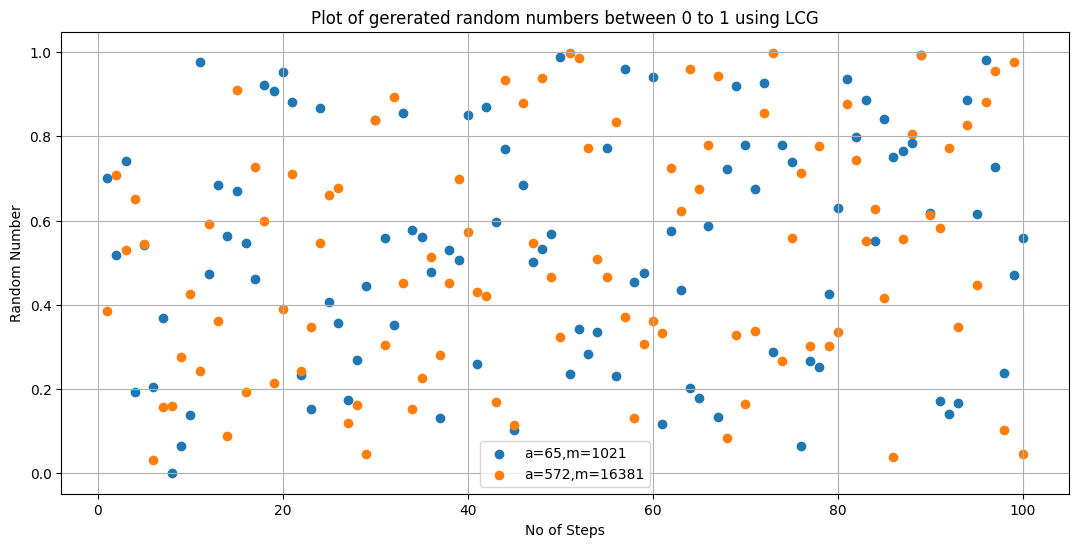

In [2]:
seed65 = lib.rng(seed=11,a=65,m=1021,c=0)
seed572 = lib.rng(seed=11,a=572,m=16381,c=0)


xlist = [i for i in range(1,101)]
ylist_1 = [seed65.gen() for i in range(1,101)]
ylist_2 = [seed572.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 using LCG')
plt.legend()
plt.grid()
plt.show()



##  QUESTION 2
### Monte-Carlo and pRNG to evaluate the integral

The value of integral is  2.0065394710490914 using 10000 points


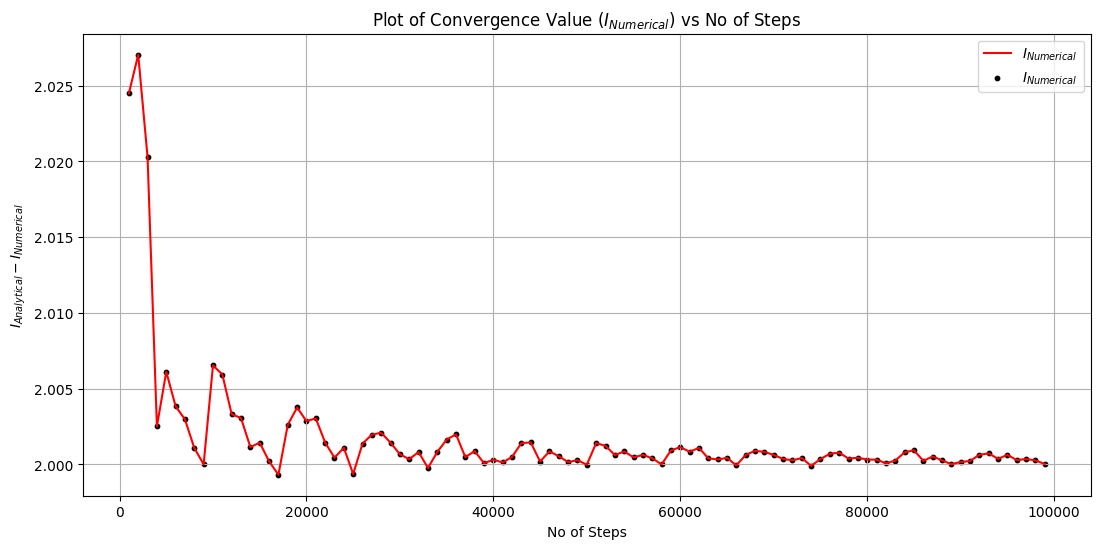

In [3]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

I = lib.monte_carlo_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points")   


xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(lib.monte_carlo_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Numerical}$',color='red')
plt.scatter(xlist,ylist,label=r'$I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()

##  QUESTION 3
### Inverse transform method and accept/reject method

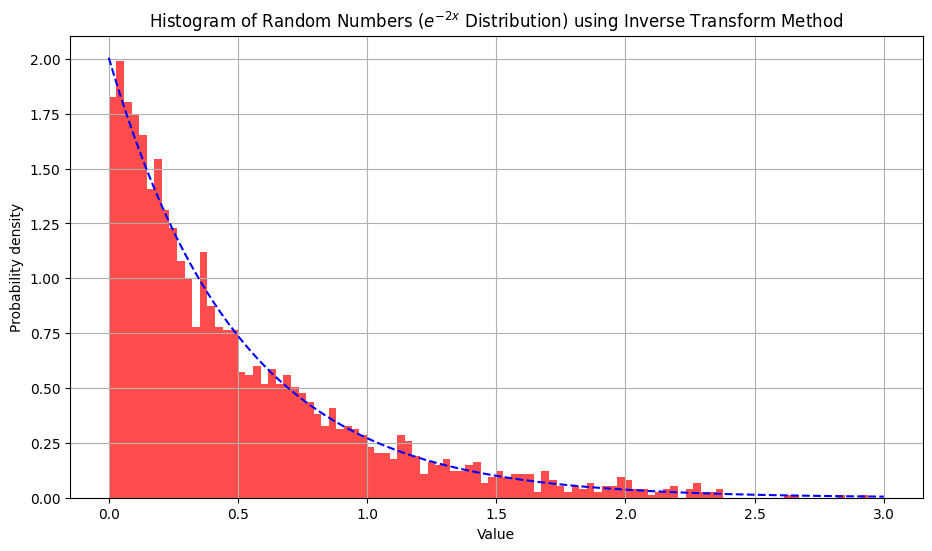

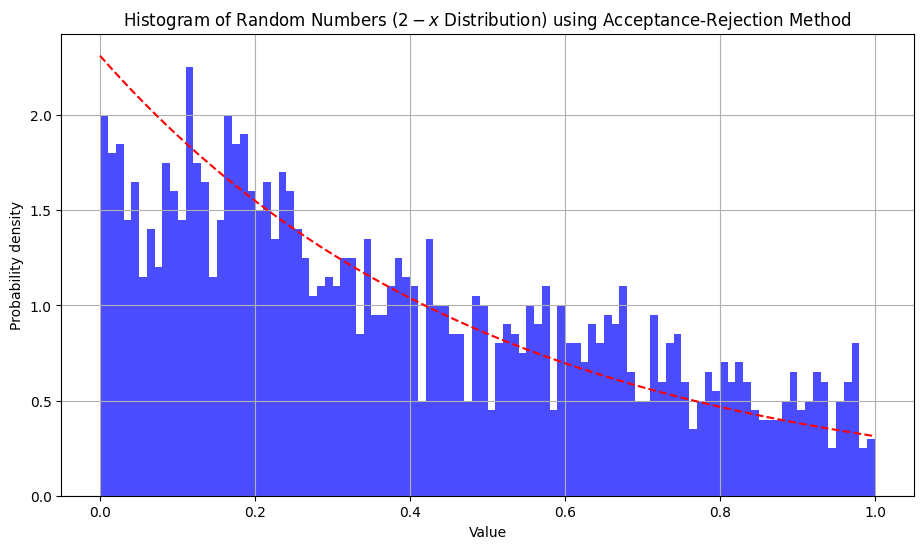

In [15]:
def f(x):
    return np.exp(-2*x)

# Defining the inverse of the distribution function
def f_inv(x):
    return -0.5*np.log(abs(1-(2*x/3)))


# Initialising the RNG
rng = lib.rng(seed = 17)


# Storing the generated random numbers
rng_list = []
for i in range(2500):
    p= 3*rng.gen()
    if f_inv(p)<3:
        rng_list.append(f_inv(p))


# Plotting the histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='red',density=True,alpha=0.7,label='Histogram of Random Numbers')
x = np.linspace(0, 3, 1000)
fx_values = f(x)
area = np.trapz(fx_values, x)
norm_fx_values = fx_values / area
plt.plot(x, norm_fx_values, 'b--', label='Normalized f(x)')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title(r'Histogram of Random Numbers ($e^{-2x}$ Distribution) using Inverse Transform Method')
plt.grid()
plt.show()





rng_1 = lib.rng(seed=19) # for x
rng_2 = lib.rng(seed=13) # for u

rng_list = []

def f(x):
    return np.exp(-2*x)

def g(x):
    return 2-x


while True:
    x= rng_1.gen()
    u= rng_2.gen()
    test = f(x)/((0.5)*g(x))
    if u<=test:
        rng_list.append(x)
    if len(rng_list)==2000:
        break
    
        
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='b',density=True,alpha=0.7,label='Histogram of Random Numbers')
x = np.linspace(0, 1, 1000)
fx_values = f(x)
area = np.trapz(fx_values, x)
norm_fx_values = fx_values / area
plt.plot(x, norm_fx_values, 'r--', label='Normalized f(x)')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title(r'Histogram of Random Numbers ($2-x$ Distribution) using Acceptance-Rejection Method')
plt.grid()
plt.show()

##  QUESTION 4
### Monte-carlo to evaluate the integral using different sampling functions

In [22]:
def f(x):
    return np.exp(-2*x)/(1+x**2)

Integral = lib.monte_carlo_integrate(f,0,2,10000,19)
print("The value of integral is ",np.round(Integral,6), "using p_1(x) ")


# Definfing the function to find the value of the integral
def f(x):
    return np.exp(-2*x)/(1+x**2)

# Defininf the limits of the integral
x_min = 0
x_max = 2

# Initialising the uniform RNG
N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-np.log(abs(1-x))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_2(x)")


# Definfing the function to find the value of the integral
def f(x):
    return np.exp(-2*x)/(1+x**2)

# Defininf the limits of the integral
x_min = 0
x_max = 2

# Initialising the uniform RNG
N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-2*np.log(abs((1-np.exp(-0.5))*x - 1))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_3(x)")


The value of integral is  0.398935 using p_1(x) 
The value of integral is  0.33938 using p_2(x)
The value of integral is  0.464736 using p_3(x)


----
### CONCLUSIONS
----

- $p_1(x) = 1/2$ for $0<x<2$ represents a Uniform distribution spanning from 0 to 2. Hence, random number generation within this range suffices for this distribution. The necessary adjustment from the interval (0,1) to (0,2) is already incorporated within the function itself.
---
- $p_2(x) = e^{-x}$ for $x>0$ signifies an exponential decay distribution. To align random numbers with this distribution, we employ the inverse transform method. The resulting transformation is expressed as:
\begin{equation}
y = -\ln(1-x)
\end{equation}
where x denotes the random number generated from the uniform distribution.
---
- $p_3 (x) = \frac{e^{-2x}}{2(1+e^{-1/2})}$ follows a similar process utilizing the inverse transform method, yielding:
\begin{equation}
y = -2 \ln(|(1-e^{-1/2})x - 1|)
\end{equation} 
where x represents the random number generated from the uniform distribution.
---
- The first distribution, being uniform, exhibits the minimum variance reduction. Minimizing variance necessitates a close approximation between the function being integrated and the probability density function p(x) from which samples are drawn.
---